# Restaurant Data Analysis

In [2]:
import pandas as pd

In [22]:
df=pd.read_csv("C:/Git Projects/Restaurant Analysis/Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Level 1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.isnull().sum()
df['Cuisines']

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

## Task1: Top Cuisines
#### Determine the top three most common cuisines in the dataset.

In [6]:
# Split the cuisines and explode them into separate rows
df_exploded = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')
df_exploded['Cuisines']

0                French
0              Japanese
0              Desserts
1              Japanese
2               Seafood
             ...       
9547               Cafe
9548            Italian
9548      World Cuisine
9549    Restaurant Cafe
9550               Cafe
Name: Cuisines, Length: 19719, dtype: object

In [7]:
# Get the top three most common cuisines
top_cuisines = df_exploded['Cuisines'].value_counts().head(3)
top_cuisines

Cuisines
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64

#### Calculate the percentage of restaurants that serve each of the top cuisines.

In [8]:
total_restaurants = df.shape[0]
top_cuisines_percentage = (top_cuisines / total_restaurants) * 100
top_cuisines_percentage

Cuisines
North Indian    41.461627
Chinese         28.635745
Fast Food       20.793634
Name: count, dtype: float64

## Task 2: City Analysis

#### Identify the city with the highest number of restaurants in the dataset.

In [10]:
city_restaurant_counts = df['City'].value_counts()
city_with_most_restaurants = city_restaurant_counts.idxmax()
#city_with_most_restaurants = city_restaurant_counts.head(1)
print('city with the highest number of restaurants:-',city_with_most_restaurants)

city with the highest number of restaurants:- New Delhi


#### Calculate the average rating for restaurants in each city.

In [13]:
# Calculate the average rating for restaurants in each city
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean()
city_avg_ratings

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

#### Determine the city with the highest average rating.

In [15]:
city_with_highest_avg_rating = city_avg_ratings.idxmax()
print('city with the highest average rating:-',city_with_highest_avg_rating ,'with rating of',city_avg_ratings[city_with_highest_avg_rating])
city_with_most_restaurants, city_restaurant_counts[city_with_most_restaurants], city_with_highest_avg_rating, city_avg_ratings[city_with_highest_avg_rating]

city with the highest average rating:- Inner City with rating of 4.9


('New Delhi', 5473, 'Inner City', 4.9)

## Task 3: Price Range Distribution

#### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

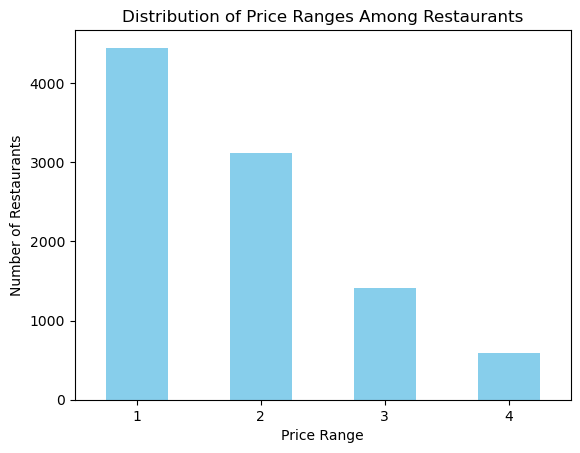

In [17]:
import matplotlib.pyplot as plt
# Create a bar chart for the price range distribution
price_range_counts = df['Price range'].value_counts().sort_index()
price_range_counts.plot(kind='bar', color='skyblue')

# Add labels and title to the plot
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xticks(rotation=0)
plt.show()

### Calculate the percentage of restaurants in each price range category.

In [18]:
price_range_percentages = (price_range_counts / total_restaurants) * 100
price_range_percentages

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64

## Task 4: Online Delivery

#### Determine the percentage of restaurants that offer online delivery.

In [19]:
online_delivery_counts = df['Has Online delivery'].value_counts()
percentage_online_delivery = (online_delivery_counts['Yes'] / total_restaurants) * 100
print('Percentage of restaurant that offers online delivery =',percentage_online_delivery )

Percentage of restaurant that offers online delivery = 25.662234321013504


#### Compare the average ratings of restaurants with and without online delivery

In [20]:
# Calculate the average ratings for restaurants with and without online delivery
average_rating_online_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
average_rating_no_online_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()
print('Average ratings of restaurants are follows:-')
print('average ratings of restaurants with online delivery is',average_rating_online_delivery)
print('average ratings of restaurants without online delivery is',average_rating_no_online_delivery)

Average ratings of restaurants are follows:-
average ratings of restaurants with online delivery is 3.2488372093023257
average ratings of restaurants without online delivery is 2.465295774647887
